In [1]:
# import pandas as pd
# import tarfile

# with tarfile.open(name='../raw_data/zelle.tar') as tf:
#     tarinfo = tf.getmember('4.jpg')
#     image = tf.extractfile(tarinfo)
#     image = image.read()
#     image = image.open(io.BytesIO(image))

In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img=mpimg.imread('../raw_data/zelle/4.jpg')

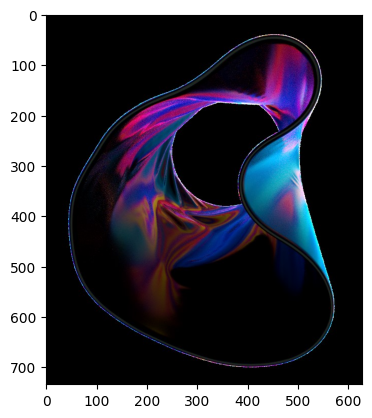

In [3]:
plt.imshow(img)

In [4]:
import os


def load_images_from_folder(foldername):
    images = []
    for filename in os.listdir(foldername):
        img=mpimg.imread(os.path.join(foldername,filename))
        if img is not None:
            images.append(img)
    return images


In [5]:
imgs = load_images_from_folder('../raw_data/subset_test')

In [6]:
!pip install tensorflow_compression
import tensorflow_compression

2023-03-07 11:58:05.344894: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


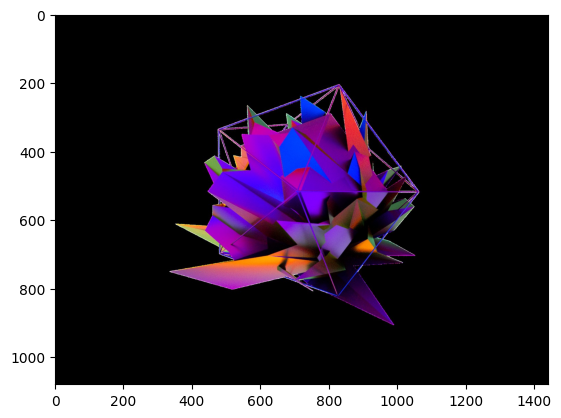

In [7]:
plt.imshow(imgs[1])

In [8]:
len(imgs)

36

In [9]:
np.unique(prediction[2])

NameError: name 'np' is not defined

In [10]:
imgs[0].shape

(1080, 1440, 3)

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np


X_train = (np.array(imgs[12:])) / 255.
X_test = (np.array(imgs[:12])) / 255.

def build_encoder(latent_dimension):
    '''returns an encoder model, of output_shape equals to latent_dimension'''
    encoder = Sequential()
    
    encoder.add(Conv2D(8, (2,2), input_shape=(1080, 1440, 3), activation='relu'))
    encoder.add(MaxPooling2D(2))

    encoder.add(Conv2D(16, (2, 2), activation='relu'))
    encoder.add(MaxPooling2D(2))

    encoder.add(Conv2D(32, (2, 2), activation='relu'))
    encoder.add(MaxPooling2D(2))     

    encoder.add(Flatten())
    encoder.add(Dense(latent_dimension, activation='tanh'))
    
    return encoder

In [12]:
X_train.shape

(24, 1080, 1440, 3)

In [13]:
encoder = build_encoder(latent_dimension=2)

2023-03-07 12:00:01.260824: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1079, 1439, 8)     104       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 539, 719, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 538, 718, 16)      528       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 269, 359, 16)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 268, 358, 32)      2080      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 134, 179, 32)     0

In [ ]:

from tensorflow.keras.layers import Reshape, Conv2DTranspose
def build_decoder(latent_dimension):
    # $CHALLENGIFY_BEGIN
    decoder = Sequential()
    decoder.add(Dense(30*40*8, activation='tanh', input_shape=(latent_dimension,)))
    decoder.add(Reshape((30, 40, 8)))  # no batch axis here
    decoder.add(Conv2DTranspose(8, (2, 2), strides=2, padding='same', activation='relu'))
    decoder.add(Conv2DTranspose(8, (2, 2), strides=2, padding='same', activation='relu'))
    decoder.add(Conv2DTranspose(8, (3, 3), strides=3, padding='same', activation='relu'))
    decoder.add(Conv2DTranspose(3, (3, 3), strides=3, padding='same', activation='relu'))
    
    return decoder

In [ ]:
decoder = build_decoder(2)

In [ ]:
decoder.summary()

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input

def build_autoencoder(encoder, decoder):
    inp = Input((1080, 1440, 3))
    encoded = encoder(inp)
    decoded = decoder(encoded)
    autoencoder = Model(inp, decoded)
    return autoencoder


In [ ]:
autoencoder = build_autoencoder(encoder, decoder)

In [ ]:
autoencoder.summary()

In [ ]:
def compile_autoencoder(autoencoder):
    autoencoder.compile(loss='mse', optimizer='adam')

In [ ]:
compile_autoencoder(autoencoder)

In [ ]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(patience=5)

autoencoder.fit(X_train, X_train, epochs = 20, batch_size = 32, callbacks=[es])

In [ ]:
plt.imshow((prediction[1] * 255).astype(np.uint8))

In [ ]:
prediction = autoencoder.predict(X_train, verbose=0, batch_size=32)# you can now display an image to see it is reconstructed well

for i in range(3):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(4,2))
    ax1.imshow((prediction[i] * 255).astype(np.uint8))
    ax2.imshow(X_train[i].reshape(1080, 1440, 3))
    plt.show()
    
    

In [ ]:
np.unique(np.around(prediction[1]*255))

In [ ]:
max(np.unique(prediction*255))

In [ ]:
np.unique(prediction[1])

# RESIZE IMAGE

In [65]:
imgs = load_images_from_folder('../raw_data/zelle')

In [66]:
from tensorflow.keras.preprocessing.image import smart_resize

In [17]:
size = (108, 144)
resized_imgs = smart_resize(imgs, size)

In [56]:
X_train = (np.array(resized_imgs)) / 255.

In [64]:
len(X_train)

36

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


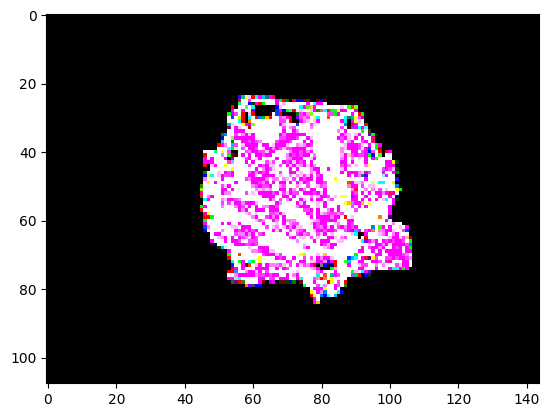

In [18]:
plt.imshow(resized_imgs[0])

In [47]:
def build_encoder(latent_dimension):
    '''returns an encoder model, of output_shape equals to latent_dimension'''
    encoder = Sequential()
    
    encoder.add(Conv2D(8, (2,2), input_shape=(108, 144, 3), activation='relu'))
    encoder.add(MaxPooling2D(2))

    encoder.add(Conv2D(16, (2, 2), activation='relu'))
    encoder.add(MaxPooling2D(2))

    encoder.add(Conv2D(32, (2, 2), activation='relu'))
    encoder.add(MaxPooling2D(2))     

    encoder.add(Flatten())
    encoder.add(Dense(latent_dimension, activation='tanh'))
    
    return encoder

In [48]:
encoder = build_encoder(latent_dimension=2)

In [49]:
from tensorflow.keras.layers import Reshape, Conv2DTranspose
def build_decoder(latent_dimension):
    # $CHALLENGIFY_BEGIN
    decoder = Sequential()
    decoder.add(Dense(3*4*8, activation='tanh', input_shape=(latent_dimension,)))
    decoder.add(Reshape((3, 4, 8)))  # no batch axis here
    decoder.add(Conv2DTranspose(8, (2, 2), strides=2, padding='same', activation='relu'))
    decoder.add(Conv2DTranspose(8, (2, 2), strides=2, padding='same', activation='relu'))
    decoder.add(Conv2DTranspose(8, (3, 3), strides=3, padding='same', activation='relu'))
    decoder.add(Conv2DTranspose(3, (3, 3), strides=3, padding='same', activation='relu'))
    
    return decoder

In [50]:
encoder.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 107, 143, 8)       104       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 53, 71, 8)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 52, 70, 16)        528       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 26, 35, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 25, 34, 32)        2080      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 12, 17, 32)      

In [51]:
decoder.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 96)                288       
                                                                 
 reshape_2 (Reshape)         (None, 3, 4, 8)           0         
                                                                 
 conv2d_transpose_8 (Conv2DT  (None, 6, 8, 8)          264       
 ranspose)                                                       
                                                                 
 conv2d_transpose_9 (Conv2DT  (None, 12, 16, 8)        264       
 ranspose)                                                       
                                                                 
 conv2d_transpose_10 (Conv2D  (None, 36, 48, 8)        584       
 Transpose)                                                      
                                                      

In [52]:
decoder = build_decoder(2)

In [53]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input
def build_autoencoder(encoder, decoder):
    inp = Input((108, 144, 3))
    encoded = encoder(inp)
    decoded = decoder(encoded)
    autoencoder = Model(inp, decoded)
    return autoencoder

autoencoder = build_autoencoder(encoder, decoder)

In [54]:
def compile_autoencoder(autoencoder):
    autoencoder.compile(loss='mse', optimizer='adam')

In [59]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(patience=10)

compile_autoencoder(autoencoder)
autoencoder.fit(X_train, X_train, epochs = 200, batch_size = 32, callbacks=[es])

Epoch 1/200
2/2 [==============================] - 2s 35ms/step - loss: 0.0287
Epoch 2/200
2/2 [==============================] - 0s 38ms/step - loss: 0.0285
Epoch 3/200
2/2 [==============================] - 0s 33ms/step - loss: 0.0284
Epoch 4/200
2/2 [==============================] - 0s 45ms/step - loss: 0.0283
Epoch 5/200
2/2 [==============================] - 0s 40ms/step - loss: 0.0282
Epoch 6/200
2/2 [==============================] - 0s 38ms/step - loss: 0.0281
Epoch 7/200
2/2 [==============================] - 0s 39ms/step - loss: 0.0280
Epoch 8/200
2/2 [==============================] - 0s 43ms/step - loss: 0.0278
Epoch 9/200
2/2 [==============================] - 0s 41ms/step - loss: 0.0277
Epoch 10/200
2/2 [==============================] - 0s 46ms/step - loss: 0.0275
Epoch 11/200
2/2 [==============================] - 0s 36ms/step - loss: 0.0274
Epoch 12/200
2/2 [==============================] - 0s 42ms/step - loss: 0.0272
Epoch 13/200
2/2 [==============================]

2/2 [==============================] - 0s 35ms/step - loss: 0.0207
Epoch 33/200
2/2 [==============================] - 0s 33ms/step - loss: 0.0204
Epoch 34/200
2/2 [==============================] - 0s 36ms/step - loss: 0.0201
Epoch 35/200
2/2 [==============================] - 0s 37ms/step - loss: 0.0198
Epoch 36/200
2/2 [==============================] - 0s 30ms/step - loss: 0.0195
Epoch 37/200
2/2 [==============================] - 0s 33ms/step - loss: 0.0192
Epoch 38/200
2/2 [==============================] - 0s 35ms/step - loss: 0.0190
Epoch 39/200
2/2 [==============================] - 0s 34ms/step - loss: 0.0187
Epoch 40/200
2/2 [==============================] - 0s 34ms/step - loss: 0.0185
Epoch 41/200
2/2 [==============================] - 0s 32ms/step - loss: 0.0182
Epoch 42/200
2/2 [==============================] - 0s 45ms/step - loss: 0.0180
Epoch 43/200
2/2 [==============================] - 0s 37ms/step - loss: 0.0178
Epoch 44/200
2/2 [==============================] - 0

2/2 [==============================] - 0s 37ms/step - loss: 0.0157
Epoch 65/200
2/2 [==============================] - 0s 33ms/step - loss: 0.0157
Epoch 66/200
2/2 [==============================] - 0s 34ms/step - loss: 0.0156
Epoch 67/200
2/2 [==============================] - 0s 37ms/step - loss: 0.0156
Epoch 68/200
2/2 [==============================] - 0s 35ms/step - loss: 0.0156
Epoch 69/200
2/2 [==============================] - 0s 42ms/step - loss: 0.0155
Epoch 70/200
2/2 [==============================] - 0s 40ms/step - loss: 0.0155
Epoch 71/200
2/2 [==============================] - 0s 44ms/step - loss: 0.0155
Epoch 72/200
2/2 [==============================] - 0s 48ms/step - loss: 0.0154
Epoch 73/200
2/2 [==============================] - 0s 37ms/step - loss: 0.0154
Epoch 74/200
2/2 [==============================] - 0s 38ms/step - loss: 0.0154
Epoch 75/200
2/2 [==============================] - 0s 34ms/step - loss: 0.0153
Epoch 76/200
2/2 [==============================] - 0

2/2 [==============================] - 0s 35ms/step - loss: 0.0149
Epoch 96/200
2/2 [==============================] - 0s 43ms/step - loss: 0.0148
Epoch 97/200
2/2 [==============================] - 0s 37ms/step - loss: 0.0148
Epoch 98/200
2/2 [==============================] - 0s 30ms/step - loss: 0.0148
Epoch 99/200
2/2 [==============================] - 0s 34ms/step - loss: 0.0148
Epoch 100/200
2/2 [==============================] - 0s 34ms/step - loss: 0.0148
Epoch 101/200
2/2 [==============================] - 0s 36ms/step - loss: 0.0148
Epoch 102/200
2/2 [==============================] - 0s 38ms/step - loss: 0.0147
Epoch 103/200
2/2 [==============================] - 0s 37ms/step - loss: 0.0147
Epoch 104/200
2/2 [==============================] - 0s 37ms/step - loss: 0.0147
Epoch 105/200
2/2 [==============================] - 0s 35ms/step - loss: 0.0147
Epoch 106/200
2/2 [==============================] - 0s 33ms/step - loss: 0.0147
Epoch 107/200
2/2 [===========================

2/2 [==============================] - 0s 38ms/step - loss: 0.0144
Epoch 128/200
2/2 [==============================] - 0s 42ms/step - loss: 0.0144
Epoch 129/200
2/2 [==============================] - 0s 34ms/step - loss: 0.0144
Epoch 130/200
2/2 [==============================] - 0s 58ms/step - loss: 0.0144
Epoch 131/200
2/2 [==============================] - 0s 37ms/step - loss: 0.0143
Epoch 132/200
2/2 [==============================] - 0s 36ms/step - loss: 0.0143
Epoch 133/200
2/2 [==============================] - 0s 43ms/step - loss: 0.0143
Epoch 134/200
2/2 [==============================] - 0s 39ms/step - loss: 0.0143
Epoch 135/200
2/2 [==============================] - 0s 35ms/step - loss: 0.0143
Epoch 136/200
2/2 [==============================] - 0s 37ms/step - loss: 0.0143
Epoch 137/200
2/2 [==============================] - 0s 56ms/step - loss: 0.0143
Epoch 138/200
2/2 [==============================] - 1s 42ms/step - loss: 0.0143
Epoch 139/200
2/2 [=======================

2/2 [==============================] - 0s 41ms/step - loss: 0.0141
Epoch 159/200
2/2 [==============================] - 0s 39ms/step - loss: 0.0141
Epoch 160/200
2/2 [==============================] - 0s 40ms/step - loss: 0.0141
Epoch 161/200
2/2 [==============================] - 0s 30ms/step - loss: 0.0141
Epoch 162/200
2/2 [==============================] - 0s 38ms/step - loss: 0.0141
Epoch 163/200
2/2 [==============================] - 0s 43ms/step - loss: 0.0141
Epoch 164/200
2/2 [==============================] - 0s 37ms/step - loss: 0.0141
Epoch 165/200
2/2 [==============================] - 0s 36ms/step - loss: 0.0141
Epoch 166/200
2/2 [==============================] - 0s 34ms/step - loss: 0.0141
Epoch 167/200
2/2 [==============================] - 0s 35ms/step - loss: 0.0141
Epoch 168/200
2/2 [==============================] - 0s 35ms/step - loss: 0.0141
Epoch 169/200
2/2 [==============================] - 0s 42ms/step - loss: 0.0141
Epoch 170/200
2/2 [=======================

2/2 [==============================] - 0s 38ms/step - loss: 0.0140
Epoch 191/200
2/2 [==============================] - 0s 36ms/step - loss: 0.0140
Epoch 192/200
2/2 [==============================] - 0s 36ms/step - loss: 0.0139
Epoch 193/200
2/2 [==============================] - 0s 40ms/step - loss: 0.0139
Epoch 194/200
2/2 [==============================] - 0s 33ms/step - loss: 0.0139
Epoch 195/200
2/2 [==============================] - 0s 38ms/step - loss: 0.0139
Epoch 196/200
2/2 [==============================] - 0s 38ms/step - loss: 0.0139
Epoch 197/200
2/2 [==============================] - 0s 37ms/step - loss: 0.0139
Epoch 198/200
2/2 [==============================] - 0s 34ms/step - loss: 0.0139
Epoch 199/200
2/2 [==============================] - 0s 33ms/step - loss: 0.0139
Epoch 200/200
2/2 [==============================] - 0s 38ms/step - loss: 0.0139


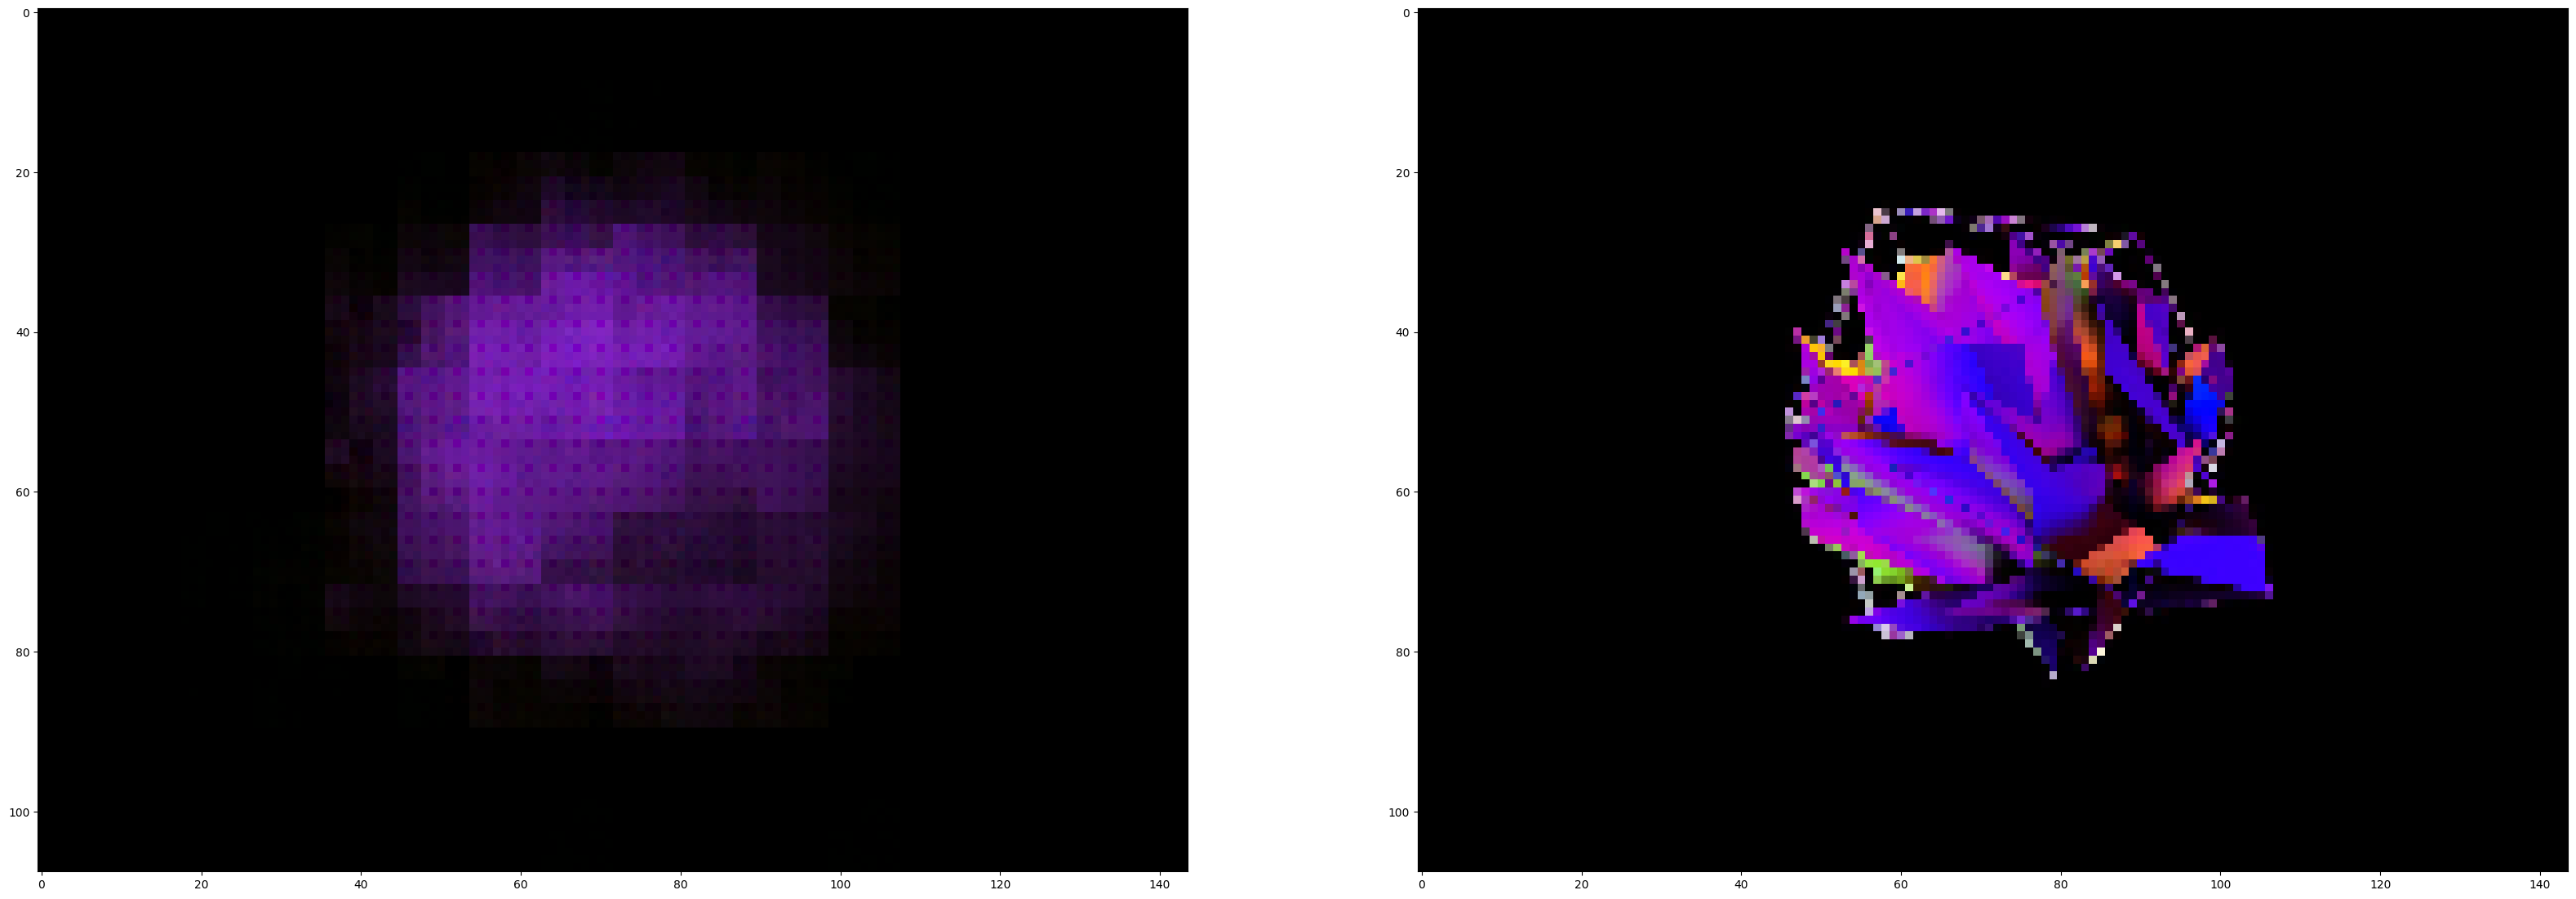

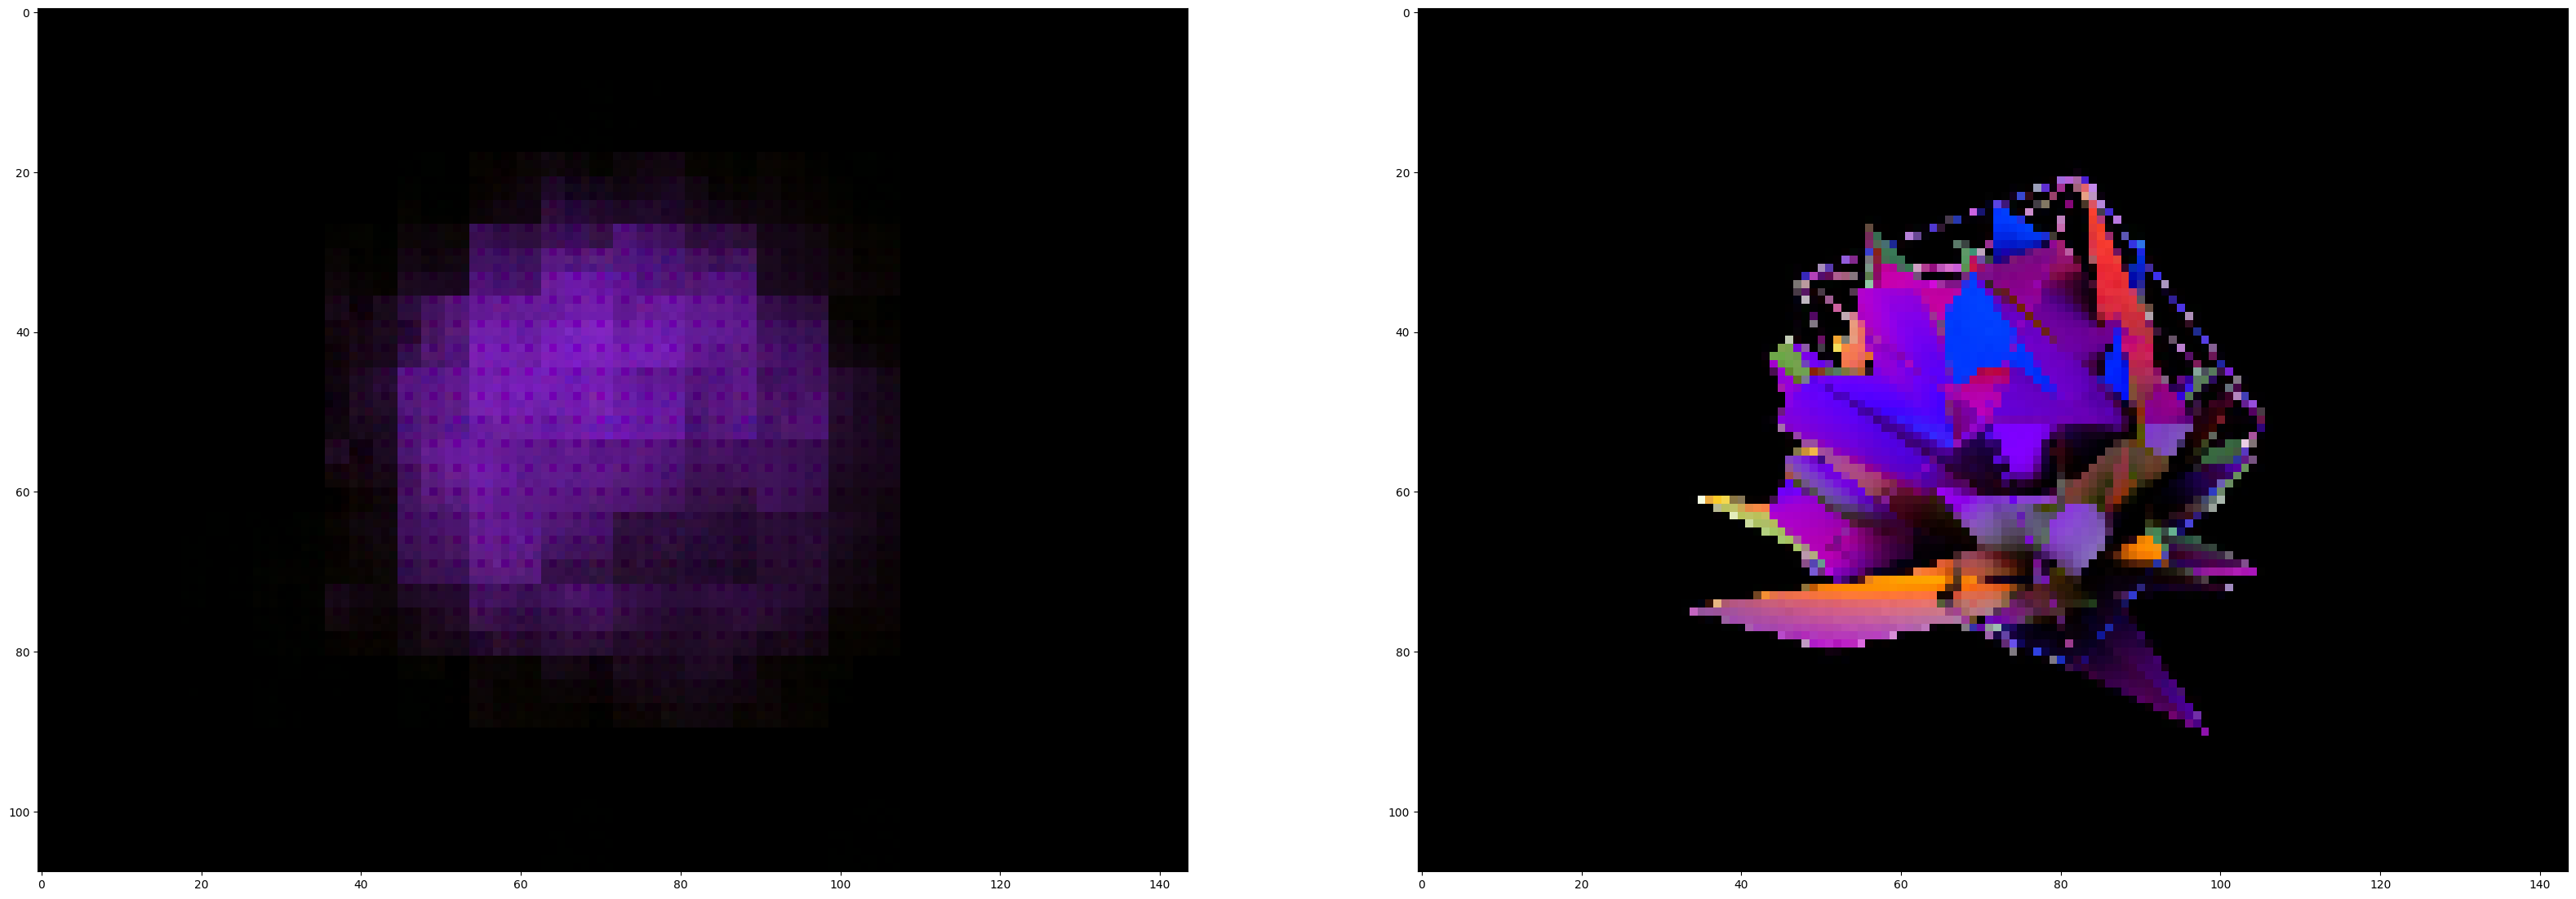

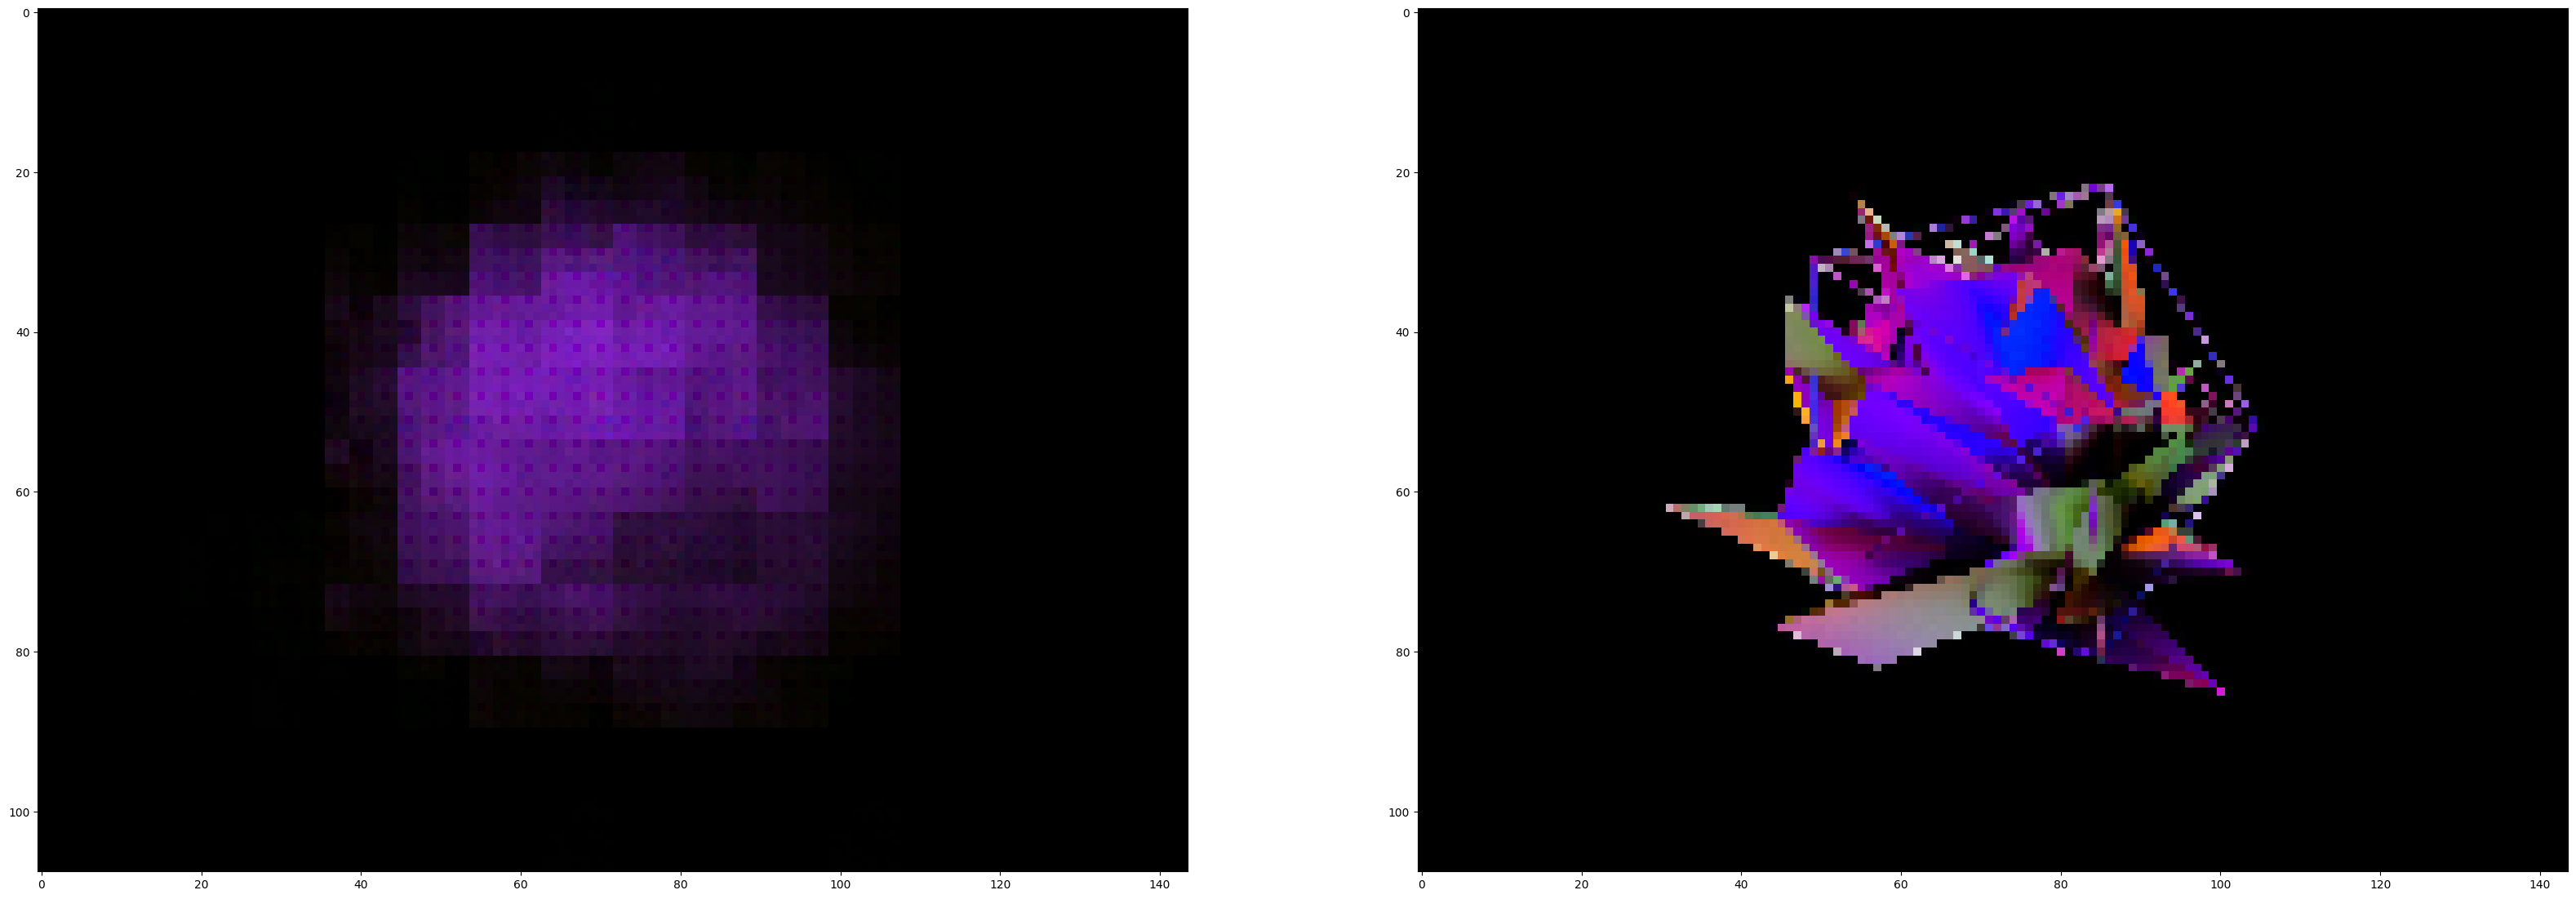

In [63]:
prediction = autoencoder.predict(X_train, verbose=0, batch_size=32)# you can now display an image to see it is reconstructed well

for i in range(3):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(40,20))
    ax1.imshow((prediction[i] * 255).astype(np.uint8))
    ax2.imshow(X_train[i].reshape(108, 144, 3))
    plt.show()
    